# Videos and Exercises for Session 3: Data Structuring in Pandas II

In this combined teaching module and exercise set, you will continue working with structuring data. 

In the last session, you were working with making operations on relatively clean data. However, before it is meaningful to make such operations, you will (as a data scientist) often have to do some very preliminary cleaning, involving for instance dealing with missings and duplicates as well as combining and restructuring larger sets of data. These are among the topics that we will be focusing on today.

The notebook is structured as follows:
1. Missings and Duplicated Data:
    - Handling Missings: Delete or Interpolate?
    - Spotting and Interpreting Duplicates
2. Combining Data Sets:
    - Intro to `merge`, `concat` and `join`
    - Horizontal and Vertical Merging
3. Split-Apply-Combine
    - Finding Means and Other Characteristics from Data Subsets (aggregation)
4. Reshaping Data
    - Wide and Long Data
    - Intro to `stack`

## Loading
Before we get started.... load in the required modules and set up the plotting library!

In [94]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

#  Part 1: Duplicates and Missings

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. This is an extract from the US Census containing almost 50,000 rows of individual-level micro data from 1994.


> **Ex. 3.1.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.
>
> _Hint 1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 
>
> _Hint 2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [95]:
# YOUR CODE HERE

# Solution to Ex 3.1.1

import pandas as pd

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 
    'capital_loss', 'hours_per_week', 'native_country', 'wage'
]

# Load the dataset into a pandas dataframe
data = pd.read_csv(url, names=column_names, skipinitialspace=True)

# Display the 25th to 35th rows
selected_rows = data.iloc[24:35]
print(selected_rows)


    age    workclass  fnlwgt          educ  educ_num      marital_status  \
24   59      Private  109015       HS-grad         9            Divorced   
25   56    Local-gov  216851     Bachelors        13  Married-civ-spouse   
26   19      Private  168294       HS-grad         9       Never-married   
27   54            ?  180211  Some-college        10  Married-civ-spouse   
28   39      Private  367260       HS-grad         9            Divorced   
29   49      Private  193366       HS-grad         9  Married-civ-spouse   
30   23    Local-gov  190709    Assoc-acdm        12       Never-married   
31   20      Private  266015  Some-college        10       Never-married   
32   45      Private  386940     Bachelors        13            Divorced   
33   30  Federal-gov   59951  Some-college        10  Married-civ-spouse   
34   22    State-gov  311512  Some-college        10  Married-civ-spouse   

         occupation   relationship                race     sex  capital_gain  \
24     

##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

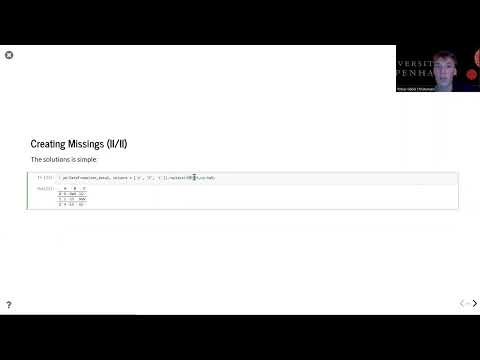

In [96]:
YouTubeVideo('mX6uMt_1-Lk', width=640, height=360)

> **Ex. 3.1.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. Store this new dataframe as `df_census_new`. How many rows are removed in this operation?
> 
> _Hint:_ NaN from NumPy might be useful. What you should discover here is that pandas indeed has native methods for dealing with missings.

In [97]:
from numpy import NaN

# YOUR CODE HERE

# Solution to Ex 3.1.2

# Load the dataset into a pandas dataframe
data = pd.read_csv(url, names=column_names, skipinitialspace=True)

# Replace missing value sign (assumed to be '?') with NaN
data.replace('?', np.nan, inplace=True)

# Count the number of rows before dropping missing values
rows_before = data.shape[0]

# Drop all rows containing any missing values
df_census_new = data.dropna()

# Count the number of rows after dropping missing values
rows_after = df_census_new.shape[0]

# Calculate the number of rows removed
rows_removed = rows_before - rows_after

print(f"Number of rows removed: {rows_removed}")

Number of rows removed: 2399


##  Duplicated Data

Watch the video below about duplicated data and how to handle such observations.

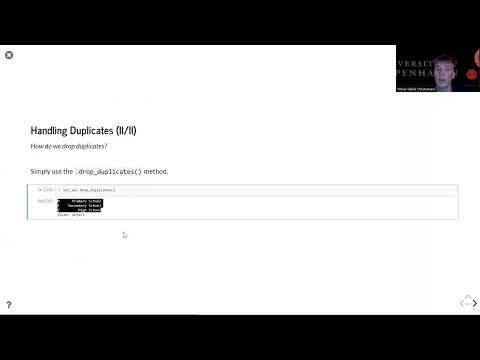

In [98]:
YouTubeVideo('aQrqhJnHIqQ', width=640, height=360)

> **Ex. 3.1.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data. You should come up with arguments from the structure of the rows.
>
> *Hint:* Just use the `load_weather()` function from the last module (provided below) to load weather data from 1863 only.

In [99]:
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

In [100]:
# YOUR CODE HERE

# Solution to Ex 3.1.3

load_weather(1863)

# Antag at df_census_new er dataframen med Census data
duplicated_census = df_census_new[df_census_new.duplicated(keep=False)]

print(duplicates)


Empty DataFrame
Columns: [station, datetime, obs_type, obs_value]
Index: []


# Part 2: Combining Data Sets

Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets.

**Note:** In the video, we are only dealing with one-to-one joins. This is a type of merge where there is only one row with a given merge key in each data frame. However, you may encounter situations where there are multiple rows that share the value of a merge key. In this situation, you may perform a one-to-many join or a many-to-many join that forms a Cartesian product of your rows.

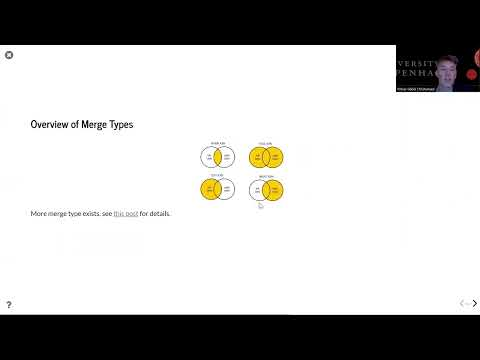

In [101]:
YouTubeVideo('y2YL_cMp8v0', width=640, height=360)

We now continue with structuring weather data. Use the function `load_weather()` for fetching and structuring weather data that you also used above.

> **Ex. 3.2.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Generate a variable that denotes the year that the observations belong to. Convert the list into a single DataFrame by concatenating vertically. 

In [102]:
# YOUR CODE HERE

# Solution 3.2.1

# List to store DataFrames
dfs = []

# Loop through years 1870-1875
for year in range(1870, 1876):
    df = load_weather(year)
    df['year'] = year
    dfs.append(df)


# Concatenate DataFrames into a single DataFrame
df_combined = pd.concat(dfs)


# Display the first few rows of the combined DataFrame
print(df_combined.head())


print(df_combined['year'].unique())



       station  datetime obs_type  obs_value  year
0  ASN00063004  18700809     TMAX       10.0  1870
1  ASN00063004  18700810     TMAX        8.9  1870
2  ASN00063004  18700811     TMAX       15.6  1870
3  ASN00063004  18700812     TMAX       16.7  1870
4  ASN00063004  18700813     TMAX       16.7  1870
[1870 1871 1872 1873 1874 1875]


# Part 3: Split-Apply-Combine

Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas

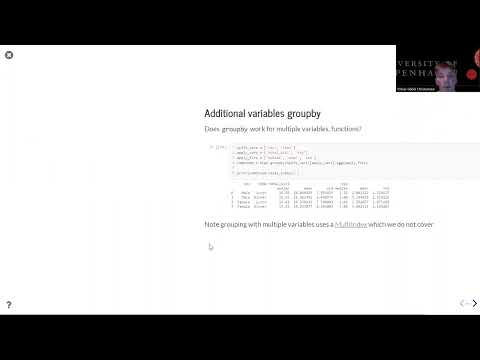

In [103]:
YouTubeVideo('pZinSHCRgbA', width=640, height=360)

*Note:* The Split-Apply-Combine method uses `.groupby()`. As indicated in the video, `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [104]:
# INCLUDED IN ASSIGNMENT 1


# Convert 'datetime' column to datetime type
df_combined['datetime'] = pd.to_datetime(df_combined['datetime'])

# Extract year and month from 'datetime'
df_combined['year'] = df_combined['datetime'].dt.year
df_combined['month'] = df_combined['datetime'].dt.month

grouped = df_combined.groupby(['station', 'year', 'month'])

# Compute the mean and median of the maximum daily temperature
temp = grouped['obs_value'].agg(tmax_mean='mean', tmax_median='median').reset_index()

# Merge the results back to the original DataFrame
weather_results = pd.merge(df_combined, temp, on=['station', 'year', 'month'], how='left')

print(weather_results)


            station                      datetime obs_type  obs_value  year  \
0       ASN00063004 1970-01-01 00:00:00.018700809     TMAX       10.0  1970   
1       ASN00063004 1970-01-01 00:00:00.018700810     TMAX        8.9  1970   
2       ASN00063004 1970-01-01 00:00:00.018700811     TMAX       15.6  1970   
3       ASN00063004 1970-01-01 00:00:00.018700812     TMAX       16.7  1970   
4       ASN00063004 1970-01-01 00:00:00.018700813     TMAX       16.7  1970   
...             ...                           ...      ...        ...   ...   
139992  USW00094728 1970-01-01 00:00:00.018751227     TMAX       10.6  1970   
139993  USW00094728 1970-01-01 00:00:00.018751228     TMAX        1.1  1970   
139994  USW00094728 1970-01-01 00:00:00.018751229     TMAX        2.8  1970   
139995  USW00094728 1970-01-01 00:00:00.018751230     TMAX        6.7  1970   
139996  USW00094728 1970-01-01 00:00:00.018751231     TMAX        7.2  1970   

        month  tmax_mean  tmax_median  
0          

> **Ex. 3.3.2:** Plot the monthly max, min, mean, first and third quartiles for maximum temperature for our station with the ID _'CA006110549'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

/var/folders/m3/mq_jwggj1sv__dm347vy0rqm0000gn/T/ipykernel_39409/1676097451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station['datetime'] = pd.to_datetime(df_station['datetime'], errors='coerce', format='%Y%m%d')
/var/folders/m3/mq_jwggj1sv__dm347vy0rqm0000gn/T/ipykernel_39409/1676097451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_station['year'] = df_station['datetime'].dt.year
/var/folders/m3/mq_jwggj1sv__dm347vy0rqm0000gn/T/ipykernel_39409/1676097451.py:9: SettingWithCopyWarning: 

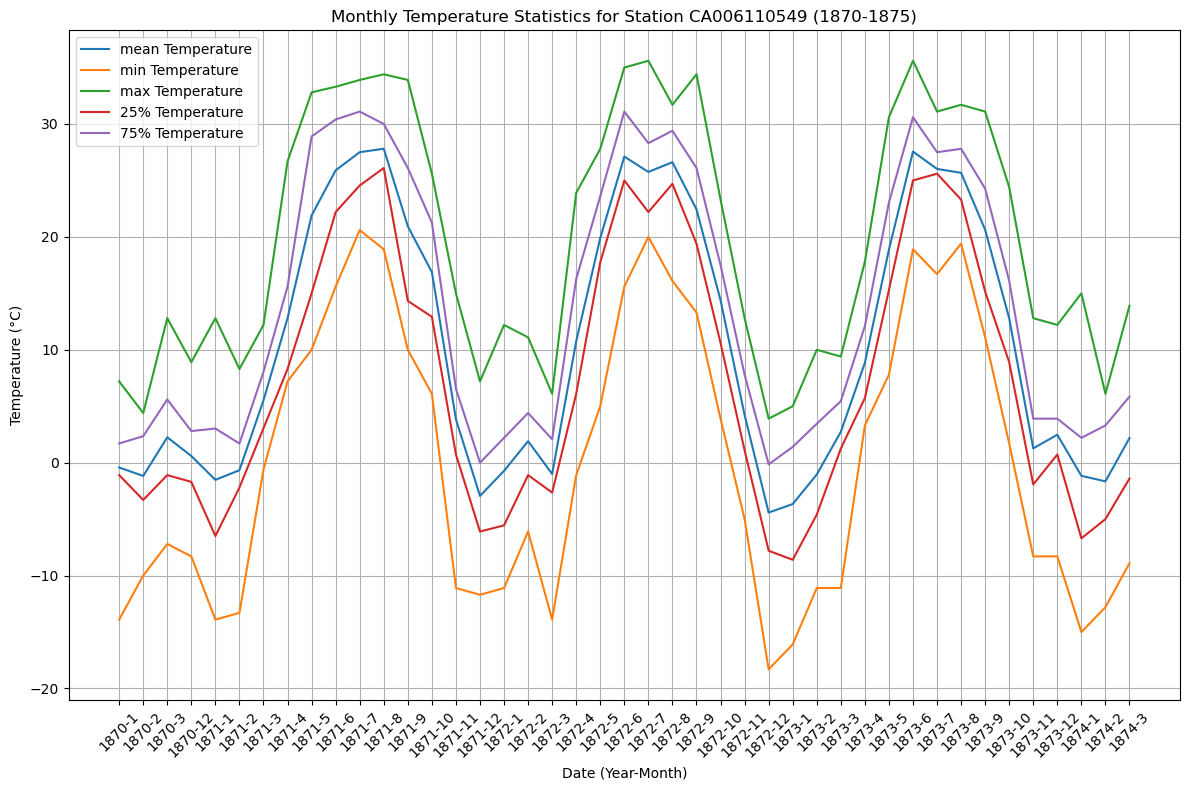

In [109]:
# INCLUDED IN ASSIGNMENT 1


# Filter data for station 'CA006110549'
station_id = 'CA006110549'
df_station = df_combined[df_combined['station'] == station_id]
df_station['datetime'] = pd.to_datetime(df_station['datetime'], errors='coerce', format='%Y%m%d')
df_station['year'] = df_station['datetime'].dt.year
df_station['month'] = df_station['datetime'].dt.month

# Group by year and month
grouped = df_station.groupby(['year', 'month'])

# Compute statistics
stats = grouped['obs_value'].describe(percentiles=[.25, .75]).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
for stat in ['mean', 'min', 'max', '25%', '75%']:
    ax.plot(stats[['year', 'month']].astype(str).agg('-'.join, axis=1), stats[f'{stat}'], label=f'{stat} Temperature')

# Formatting
ax.set_title(f'Monthly Temperature Statistics for Station {station_id} (1870-1875)')
ax.set_xlabel('Date (Year-Month)')
ax.set_ylabel('Temperature (°C)')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


> **Ex. 3.3.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has *fixed width format* - does there exist a pandas reader for that? Here Google might be helpful!

In [111]:
# INCLUDED IN ASSIGNMENT 1

import pandas as pd

def load_weather(year):
    # Load and preprocess NOAA weather data for the given year
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    df_weather = pd.read_csv(url, header=None)
    df_weather = df_weather.iloc[:, :4]
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    return df_reset

# Load data for years 1870-1875
years = range(1870, 1876)
dfs = [load_weather(year) for year in years]
df_combined = pd.concat(dfs, ignore_index=True)

# Define the column widths and names based on the provided format
column_specs = [
    (0, 11),   # ID
    (12, 20),  # LATITUDE
    (21, 30),  # LONGITUDE
    (31, 37),  # ELEVATION
    (38, 40),  # STATE
    (41, 71),  # NAME
    (72, 75),  # GSN FLAG
    (76, 79),  # HCN/CRN FLAG
    (80, 85)   # WMO ID
]

column_names = [
    'ID', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATE', 'NAME', 
    'GSN_FLAG', 'HCN_CRN_FLAG', 'WMO_ID'
]

# Read the fixed-width formatted file
station_data_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
station_data = pd.read_fwf(station_data_url, colspecs=column_specs, names=column_names, header=None)

# Merge the station location data with weather data
df_merged = pd.merge(df_combined, station_data, left_on='station', right_on='ID', how='left')

# Display the first few rows of the merged DataFrame to verify
print(df_merged.head())


       station  datetime obs_type  obs_value           ID  LATITUDE  \
0  ASN00063004  18700809     TMAX       10.0  ASN00063004  -33.4167   
1  ASN00063004  18700810     TMAX        8.9  ASN00063004  -33.4167   
2  ASN00063004  18700811     TMAX       15.6  ASN00063004  -33.4167   
3  ASN00063004  18700812     TMAX       16.7  ASN00063004  -33.4167   
4  ASN00063004  18700813     TMAX       16.7  ASN00063004  -33.4167   

   LONGITUDE  ELEVATION STATE           NAME GSN_FLAG HCN_CRN_FLAG  WMO_ID  
0     149.55      704.0   NaN  BATHURST GAOL      NaN          NaN     NaN  
1     149.55      704.0   NaN  BATHURST GAOL      NaN          NaN     NaN  
2     149.55      704.0   NaN  BATHURST GAOL      NaN          NaN     NaN  
3     149.55      704.0   NaN  BATHURST GAOL      NaN          NaN     NaN  
4     149.55      704.0   NaN  BATHURST GAOL      NaN          NaN     NaN  


##  Bonus Exercises

If you want to practice *split-apply-combine* a bit more before proceeding, we have generated two additional exercises that use the US census data from Part 1. In order to solve this exercise, you should use `df_census_new` which you generated in a previous exercise.
> **Ex. 3.3.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [107]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

> **Ex. 3.3.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Part 4: Reshaping  Dataframes

Often we have data that comes in a format that does not fit our purpose.

In [ ]:
YouTubeVideo('cJOo01dj5hs', width=640, height=360)

In this exercise, we continue working with the NOAA data that you worked with in the main section of part 3.

> **Ex. 3.4.1:** For which months was the temperature in general (i.e. use the mean) lower in 1870 vs. 1875?
>
> *Hint:* you may use `unstack`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()